In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import glob
import math

In [2]:
path = r'C:\Users\khanf\Documents\PROJECT\MSFT_1HOUR_t7vfni'
all_files = glob.glob(path + "/*.csv")
li = []
index = ["DATETIME", "OPEN", "HIGH", "LOW", "CLOSE", "VOLUME", "NUMBER OF TRADES", "WEIGHTED AV. PRICE"]
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, names=index)
    li.append(df)

msft = pd.concat(li, axis=0, ignore_index=True, sort=False)

In [3]:
msft.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE
0,2004.01.23 09:30:00,28.27,28.62,28.53,28.22,255885,21336,28.438
1,2004.01.23 10:00:00,28.54,28.76,28.66,28.52,229302,24071,28.651
2,2004.01.23 11:00:00,28.66,28.70,28.55,28.52,156298,17527,28.613
3,2004.01.23 12:00:00,28.55,28.59,28.41,28.40,125556,14631,28.497
4,2004.01.23 13:00:00,28.41,28.61,28.48,28.37,137064,14527,28.485


In [4]:
# msft = pd.DataFrame(msft.DATETIME.str.split(' ',1).tolist(),
#                                    columns = ['DATE','TIME'])
msft[['DATE','TIME']] = msft.DATETIME.str.split(expand=True)
msft[["YEAR", "MONTH", "DAY"]] = msft.DATE.str.split(".", expand=True)

In [5]:
msft.head()

,DATETIME,OPEN,HIGH,LOW,CLOSE,VOLUME,NUMBER OF TRADES,WEIGHTED AV. PRICE,DATE,TIME,YEAR,MONTH,DAY
0,2004.01.23 09:30:00,28.27,28.62,28.53,28.22,255885,21336,28.438,2004.01.23,09:30:00,2004,01,23
1,2004.01.23 10:00:00,28.54,28.76,28.66,28.52,229302,24071,28.651,2004.01.23,10:00:00,2004,01,23
2,2004.01.23 11:00:00,28.66,28.70,28.55,28.52,156298,17527,28.613,2004.01.23,11:00:00,2004,01,23
3,2004.01.23 12:00:00,28.55,28.59,28.41,28.40,125556,14631,28.497,2004.01.23,12:00:00,2004,01,23
4,2004.01.23 13:00:00,28.41,28.61,28.48,28.37,137064,14527,28.485,2004.01.23,13:00:00,2004,01,23


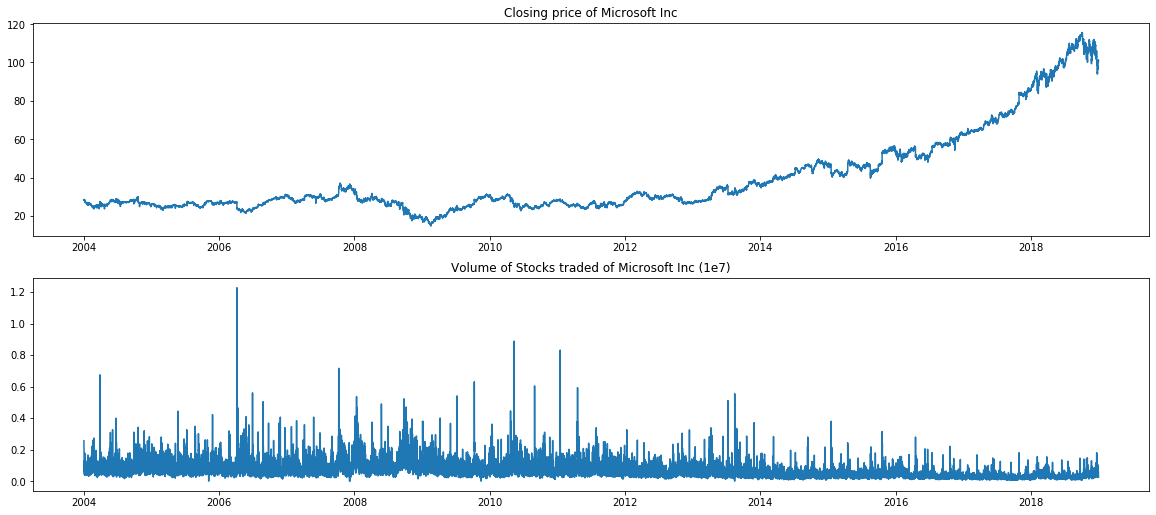

In [12]:
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.notebook_repr_html', True)
# pd.set_option('display.width', 1500)
# pd.set_option('display.max_columns', 100)
fig,ax=plt.subplots(2,1,figsize=(20,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
date = np.linspace(2004, 2019, num = 26208)
ax[0].plot(date, msft['CLOSE'])
ax[0].set_title('Closing price of Microsoft Inc')

ax[1].plot(date, msft['VOLUME']/1000000)
ax[1].set_title('Volume of Stocks traded of Microsoft Inc (1e7)')


plt.show()